<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** _Himanshi Sachdeva_

**Student ID:** _224850909_

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations informed by your work.

In [1]:
# Load data from Drive
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/JMG_data.csv')
df.head()


,CarID,Listed_Price,Listed_Date,Make,Model,Year,Vehicle_Type,Size,Color,Transmission,Fuel_Type,Drive,Cylinders,Odometer,Condition,Title_Status,State,Region
0,1246014,13987,2021-04-24T09:23:15-0500,chevrolet,silverado 1500,2007,truck,mid-size,red,automatic,gas,rwd,8.0,112709,excellent,clean,wi,appleton-oshkosh-FDL
1,692370,2800,2021-04-15T22:07:43-0400,toyota,4runner,1999,SUV,full-size,silver,automatic,gas,rwd,6.0,297053,good,clean,nc,asheville
2,242958,1750,2021-05-02T13:02:12-0600,ford,escape xlt awd,2003,SUV,mid-size,grey,automatic,gas,4wd,6.0,142500,good,clean,co,pueblo
3,310455,9200,2021-04-12T12:20:38-0400,dodge,journey,2015,SUV,full-size,white,automatic,gas,fwd,6.0,111000,excellent,clean,fl,ocala
4,800040,9900,2021-04-30T13:36:13-0400,toyota,rav4 awd,2010,SUV,mid-size,grey,automatic,gas,4wd,4.0,112000,good,clean,ny,buffalo


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

In [2]:
# Load requires libraries

# Load data from CloudDeakin

# Basic info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert Listed_Date to datetime
df['Listed_Date'] = pd.to_datetime(df['Listed_Date'], errors='coerce')

# Check for null dates
print("Null values in Listed_Date:", df['Listed_Date'].isnull().sum())

# Assume current year is 2025 for age calculation
df['Car_Age'] = 2025 - df['Year']

# Display few rows to verify
df[['Year', 'Car_Age', 'Listed_Date']].head()

# Drop rows where target 'Listed_Price' is missing
df = df.dropna(subset=['Listed_Price'])

# Fill other missing values with a placeholder or mode
df['Fuel_Type'] = df['Fuel_Type'].fillna('unknown')
df['Condition'] = df['Condition'].fillna('unknown')
df['Transmission'] = df['Transmission'].fillna('unknown')

# Drop any remaining rows with missing critical values for now
df = df.dropna()

# Fill missing cylinders with the mode (most common value)
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])

# Replace missing values in 'Region' with 'Unknown'
df['Region'] = df['Region'].fillna('Unknown')

# Confirm all missing data is handled
print("Missing values remaining:\n", df.isnull().sum())

# Try better datetime conversion
df['Listed_Date'] = pd.to_datetime(df['Listed_Date'], errors='coerce', infer_datetime_format=True)

# Check again
print("Null values in Listed_Date:", df['Listed_Date'].isnull().sum())

# Look at a sample of unique date strings
df['Listed_Date'].unique()[:10]


Dataset shape: (62946, 18)

Data types:
CarID             int64
Listed_Price      int64
Listed_Date      object
Make             object
Model            object
Year              int64
Vehicle_Type     object
Size             object
Color            object
Transmission     object
Fuel_Type        object
Drive            object
Cylinders       float64
Odometer          int64
Condition        object
Title_Status     object
State            object
Region           object
dtype: object

Missing values per column:
CarID             0
Listed_Price      0
Listed_Date       0
Make              0
Model             0
Year              0
Vehicle_Type      0
Size              0
Color             0
Transmission      0
Fuel_Type         0
Drive             0
Cylinders       374
Odometer          0
Condition         0
Title_Status      0
State             0
Region          301
dtype: int64


<ipython-input-2-f6d253278b0b>:15: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Listed_Date'] = pd.to_datetime(df['Listed_Date'], errors='coerce')


Null values in Listed_Date: 0


<ipython-input-2-f6d253278b0b>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mode()[0])
<ipython-input-2-f6d253278b0b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].fillna('Unknown')
<ipython-input-2-f6d253278b0b>:47: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-t

Missing values remaining:
 CarID           0
Listed_Price    0
Listed_Date     0
Make            0
Model           0
Year            0
Vehicle_Type    0
Size            0
Color           0
Transmission    0
Fuel_Type       0
Drive           0
Cylinders       0
Odometer        0
Condition       0
Title_Status    0
State           0
Region          0
Car_Age         0
dtype: int64
Null values in Listed_Date: 46793


<DatetimeArray>
['2021-04-24 09:23:15-05:00',                       'NaT',
 '2021-04-20 13:23:48-05:00', '2021-05-04 16:10:47-05:00',
 '2021-04-15 08:58:51-05:00', '2021-05-03 15:19:22-05:00',
 '2021-04-28 11:11:15-05:00', '2021-05-02 15:46:42-05:00',
 '2021-05-02 20:37:10-05:00', '2021-05-03 17:53:04-05:00']
Length: 10, dtype: datetime64[ns, UTC-05:00]

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Function to identify and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for 'Listed_Price'
df = remove_outliers_iqr(df, 'Listed_Price')

# Example usage for other columns (replace 'Odometer' with the desired column)
# df = remove_outliers_iqr(df, 'Odometer')

df.shape


(58819, 19)

In [4]:
# EDA

# Question 1

# Summary statistics for numerical columns
df[['Listed_Price', 'Odometer', 'Year', 'Car_Age']].describe()

# Distribution of key categorical attributes
print("\nTop 10 Makes:\n", df['Make'].value_counts().head(10))
print("\nVehicle Types:\n", df['Vehicle_Type'].value_counts())
print("\nSize Distribution:\n", df['Size'].value_counts())
print("\nCondition Distribution:\n", df['Condition'].value_counts())



Top 10 Makes:
 Make
ford         11135
chevrolet     8793
toyota        5271
honda         3820
nissan        3116
jeep          2446
gmc           2246
dodge         1912
ram           1804
bmw           1616
Name: count, dtype: int64

Vehicle Types:
 Vehicle_Type
sedan          17063
SUV            15517
truck           8819
pickup          4676
coupe           3201
hatchback       2427
van             2073
convertible     1615
mini-van        1458
wagon           1274
other            350
offroad          239
bus              107
Name: count, dtype: int64

Size Distribution:
 Size
full-size      31732
mid-size       18376
compact         7645
sub-compact     1066
Name: count, dtype: int64

Condition Distribution:
 Condition
excellent    29169
good         19442
like new      7320
fair          2382
new            323
salvage        183
Name: count, dtype: int64


<ipython-input-5-768d649b1bd9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette='muted')


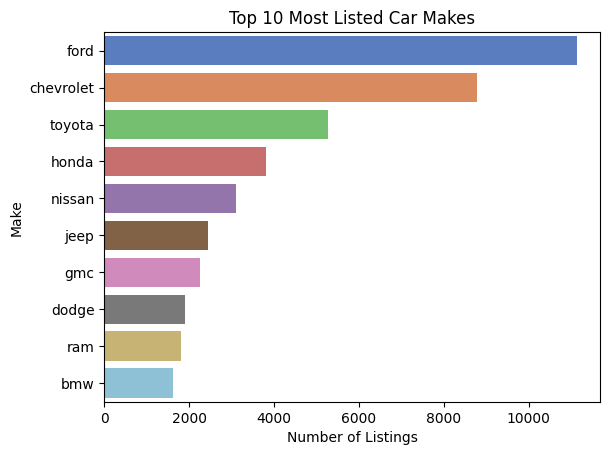

<ipython-input-5-768d649b1bd9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='muted')


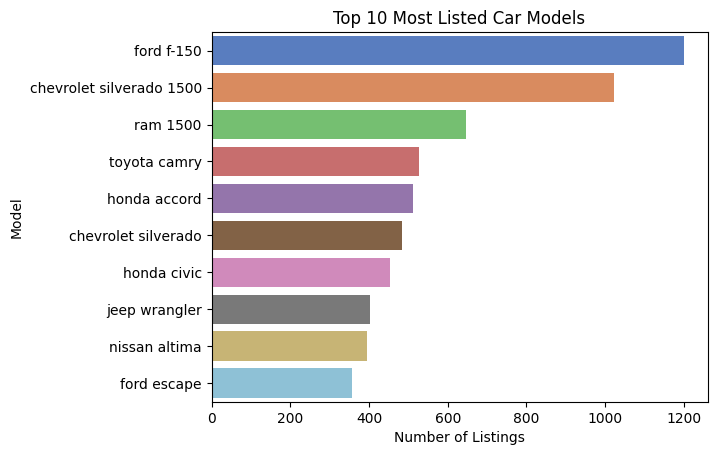

In [5]:
# Question 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Top 10 car makes by listing count
top_makes = df['Make'].value_counts().head(10)

sns.barplot(x=top_makes.values, y=top_makes.index, palette='muted')
plt.title('Top 10 Most Listed Car Makes')
plt.xlabel('Number of Listings')
plt.ylabel('Make')
plt.show()

# Combine Make + Model
df['Full_Model'] = df['Make'] + ' ' + df['Model']

# Top 10 car models
top_models = df['Full_Model'].value_counts().head(10)

sns.barplot(x=top_models.values, y=top_models.index, palette='muted')
plt.title('Top 10 Most Listed Car Models')
plt.xlabel('Number of Listings')
plt.ylabel('Model')
plt.show()


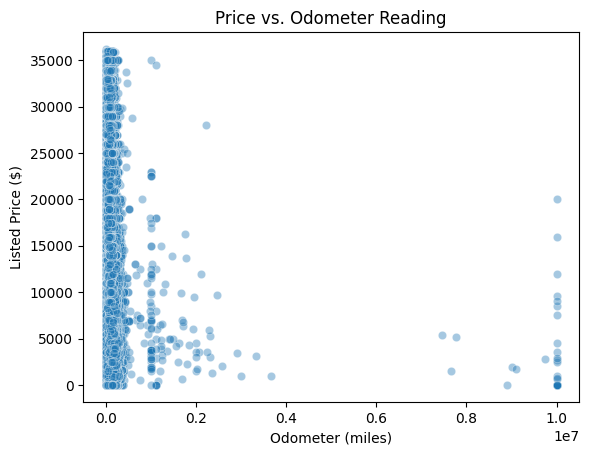

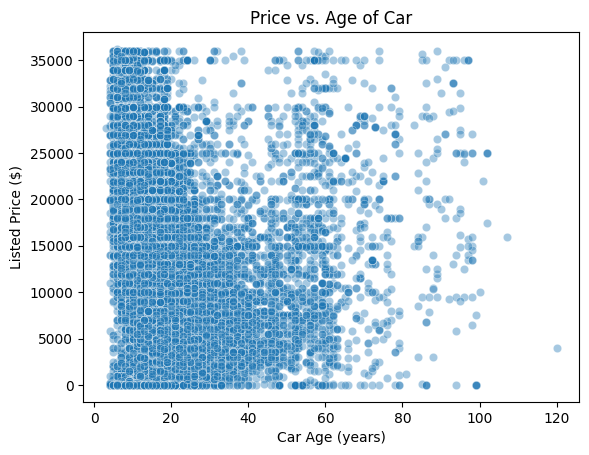

In [6]:
# Question 3

# Price vs Odometer
sns.scatterplot(x='Odometer', y='Listed_Price', data=df, alpha=0.4)
plt.title('Price vs. Odometer Reading')
plt.xlabel('Odometer (miles)')
plt.ylabel('Listed Price ($)')
plt.show()

# Price vs Age
sns.scatterplot(x='Car_Age', y='Listed_Price', data=df, alpha=0.4)
plt.title('Price vs. Age of Car')
plt.xlabel('Car Age (years)')
plt.ylabel('Listed Price ($)')
plt.show()


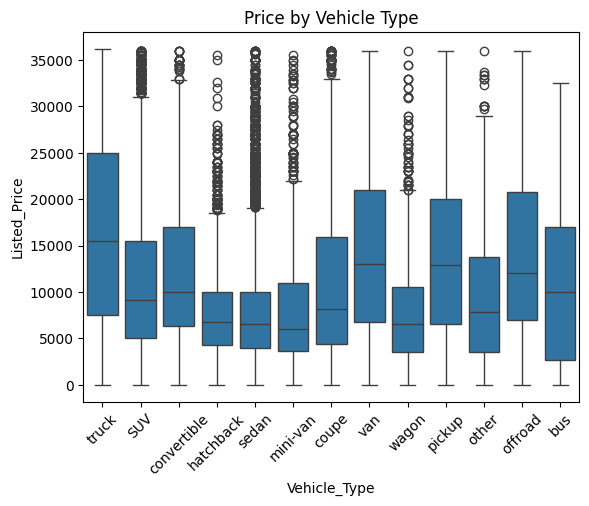

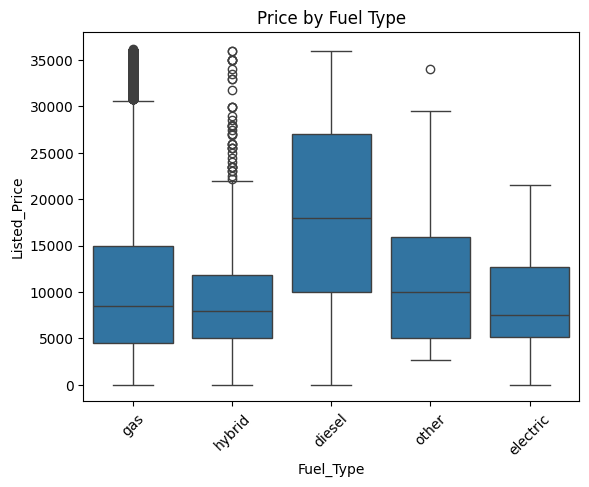

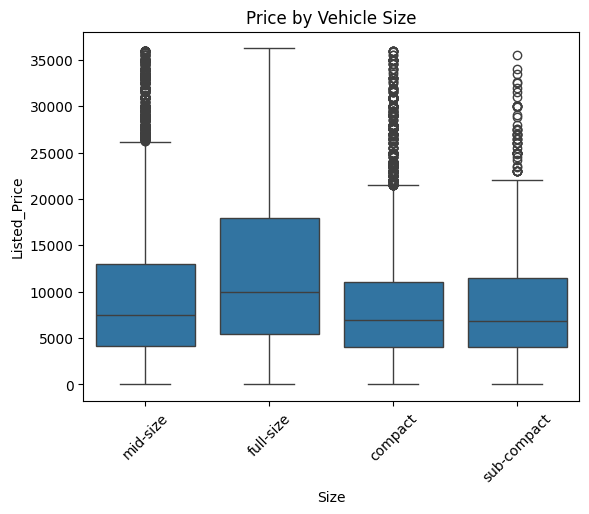

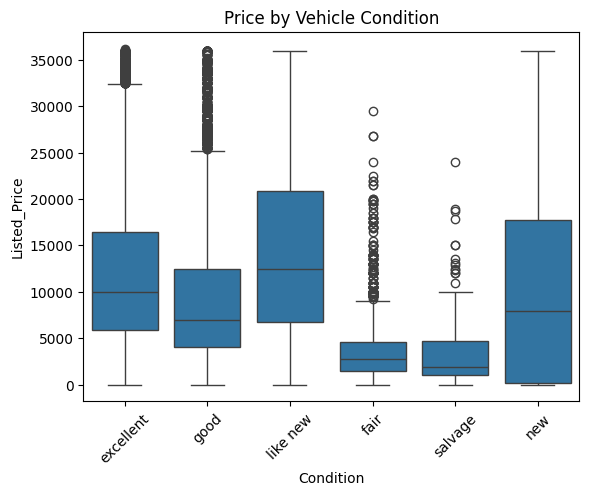

In [7]:
# Question 4

# Boxplots — Price by Categorical Features

# Vehicle Type
sns.boxplot(x='Vehicle_Type', y='Listed_Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Vehicle Type')
plt.show()

# Fuel Type
sns.boxplot(x='Fuel_Type', y='Listed_Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Fuel Type')
plt.show()

# Size
sns.boxplot(x='Size', y='Listed_Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Vehicle Size')
plt.show()

# Condition
sns.boxplot(x='Condition', y='Listed_Price', data=df)
plt.xticks(rotation=45)
plt.title('Price by Vehicle Condition')
plt.show()


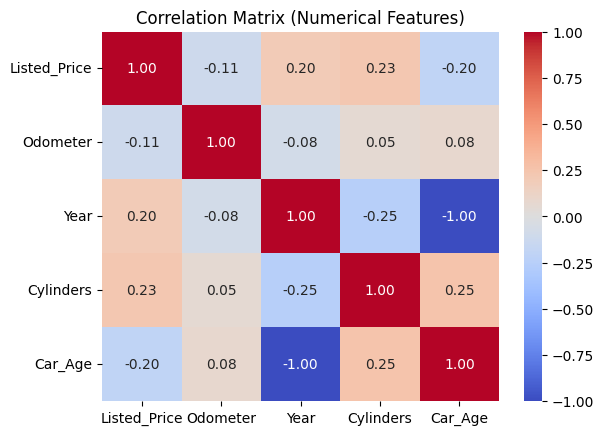

In [8]:
# Question 5

# Correlation matrix for numeric columns
numeric_cols = ['Listed_Price', 'Odometer', 'Year', 'Cylinders', 'Car_Age']
corr_matrix = df[numeric_cols].corr()

# Plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()



<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

In [15]:
# Code
# Drop non-informative or high-cardinality columns
df_model = df.drop(columns=['CarID', 'Listed_Date', 'Region', 'Model', 'Full_Model'])

# Encode categorical features using one-hot encoding
df_model = pd.get_dummies(df_model, drop_first=True)

# Check the shape of the final dataset
print("Shape after encoding:", df_model.shape)
df_model.head()



Shape after encoding: (58819, 137)


,Listed_Price,Year,Cylinders,Odometer,Car_Age,Make_alfa-romeo,Make_aston-martin,Make_audi,Make_bmw,Make_buick,...,State_sd,State_tn,State_tx,State_ut,State_va,State_vt,State_wa,State_wi,State_wv,State_wy
0,13987,2007,8.0,112709,18,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2800,1999,6.0,297053,26,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1750,2003,6.0,142500,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9200,2015,6.0,111000,10,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9900,2010,4.0,112000,15,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Train-Test Split & Model Training
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Target variable
y = df_model['Listed_Price']

# Feature variables
X = df_model.drop(columns=['Listed_Price'])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



Training set size: (47055, 136)
Testing set size: (11764, 136)


RandomForestRegressor(random_state=42)

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [17]:
# Code

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R² Score:", round(r2_score(y_true, y_pred), 4))

# Evaluate both
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest Regressor")



📊 Linear Regression Performance:
MAE: 5164.44
RMSE: 6943.87
R² Score: 0.3269

📊 Random Forest Regressor Performance:
MAE: 2344.94
RMSE: 4092.28
R² Score: 0.7662


<ipython-input-18-a1d32e2a2c11>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


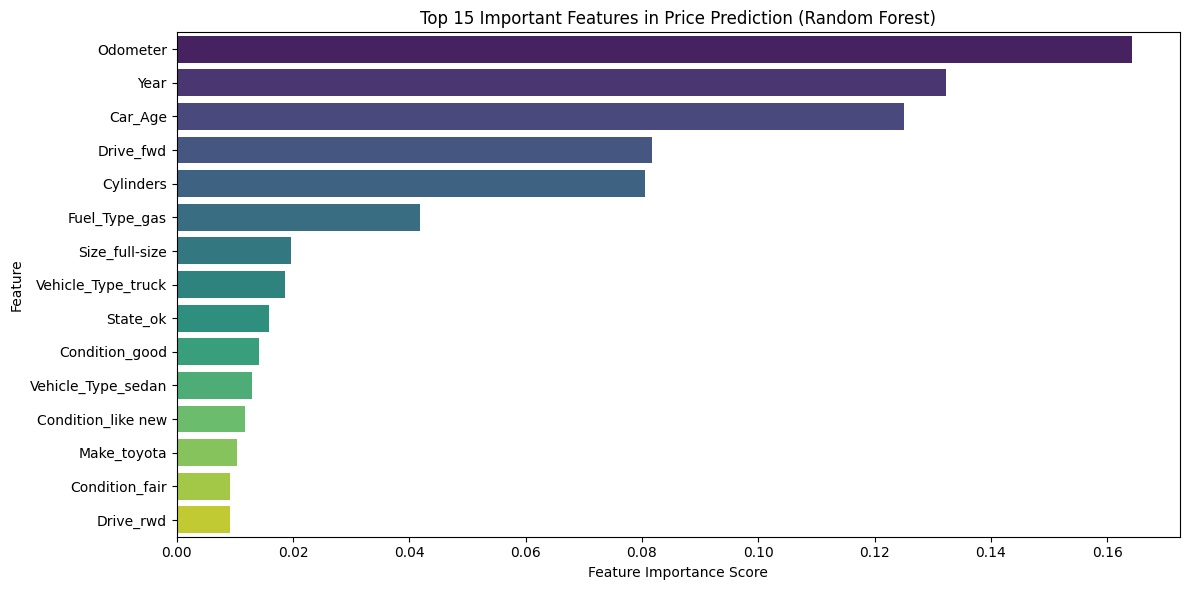

In [18]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 15 Features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Top 15 Important Features in Price Prediction (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 5. Competition (optional)

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To (optionally) participate in the competetion.

_Use this section to report the deployment of the model on the unseen dataset. To ensure that the training and deployment datasets have similar features, it is important to preprocess the data in a consistent manner. This includes applying the same data preprocessing steps to both the training and deployment datasets. For example, if you are scaling the features in the training dataset, you should also scale the features in the deployment dataset using the same scaling method and parameters._

_Apply the trained model to predict the label for the deployment dataset and submit the result (inspection dataframe) as a csv file with you assessment._




In [ ]:
import pandas as pd

In [ ]:
#read the the competition dataset


In [ ]:
# Apply data transformation to the competition data,
# ensure number of features and transformation of X and X_competion are similar

# Apply trained model to X_competition
# y_competition = model(X_compeition)

#
# join unseen y_competition with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_competition})

# join X_competition with the new dataframe
inspection = pd.concat([X_competition, inspection], axis=1)

# Submit this results.csv file to join the competition, for example
inspection.to_csv('Competition_pred.csv')